## Map Matching with Road Network when the available traces are in form of LineString

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kaizen_mapping.utils.gis import read_data_frame
from kaizen_mapping.map.matcher import Match
from kaizen_mapping.map.road import road_network_from_data_frame
from kaizen_mapping.map.trace import traces_from_data_frame

### Read the Road Network File
Required Param = ['u', 'v'] (*start node* and *end node* of a edge)

In [2]:
road_network_data_frame = read_data_frame(r"D:\Cypherics\Library\kaizen\data\please_work_osm.shp")
road_network_data_frame.columns

Index(['osmid', 'ref', 'name', 'highway', 'oneway', 'length', 'u', 'v', 'key',
       'fid', 'geometry'],
      dtype='object')

### Read the Trace File 
The code assumes every road element as a independent trace and every point on the trace as a trace point

In [3]:
traces_data_frame = read_data_frame(r"D:\Cypherics\Library\kaizen\data\demo1.shp")

### Plot Road network along with Trace

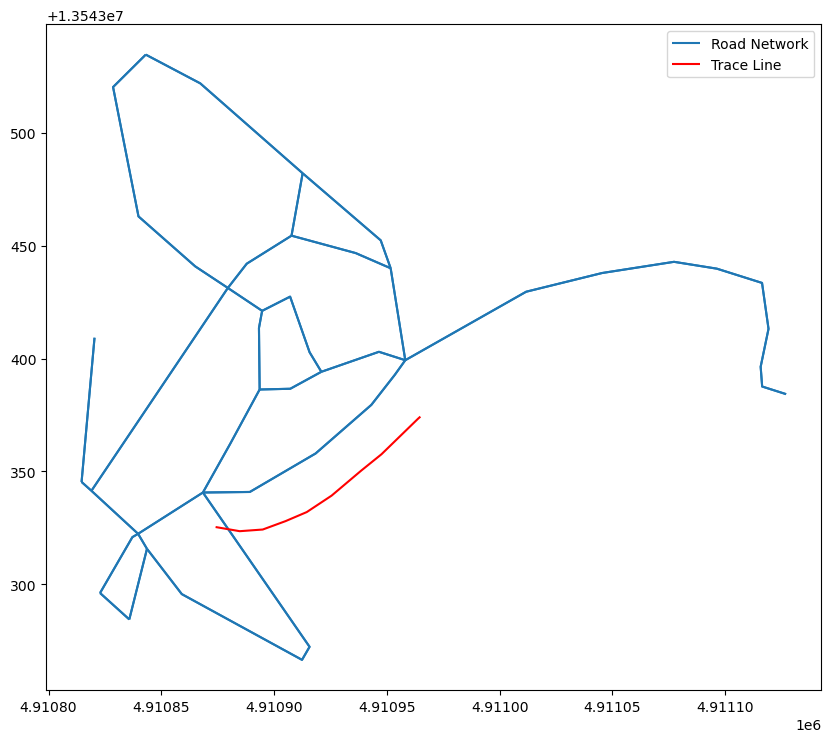

In [4]:
f, ax = plt.subplots(1)
road_network_data_frame.plot(ax=ax, label='Road Network')
traces_data_frame.plot(ax=ax,cmap=None, color="red", label='Trace Line')
plt.legend()
plt.show()

### Initialize Road Network and Trace

In [5]:
road_network = road_network_from_data_frame(road_network_data_frame)
traces = traces_from_data_frame(traces_data_frame)

### Initialize the Matcher
observation_error is used to tell how off in *meters* the trace point are expected from the road network

In [6]:
matcher = Match(road_network, observation_error=30)

#### Run
- The matcher will keep on yielding the results untill all the traces are processed
- The Matcher returns 3 results
    - *connected_shape* -- List[LineString]
        This is the list road elements map matched to the trace
    - *connected_info* -- Contains all the information associated with the map maptched road elements that is present in the provided road network
    - *reference_poi* -- Reference Point of Trace on the map matched road elements

>>Map Matcher Progress: TraceID 242337638821913839862623368563350175116, Traces - 10/10

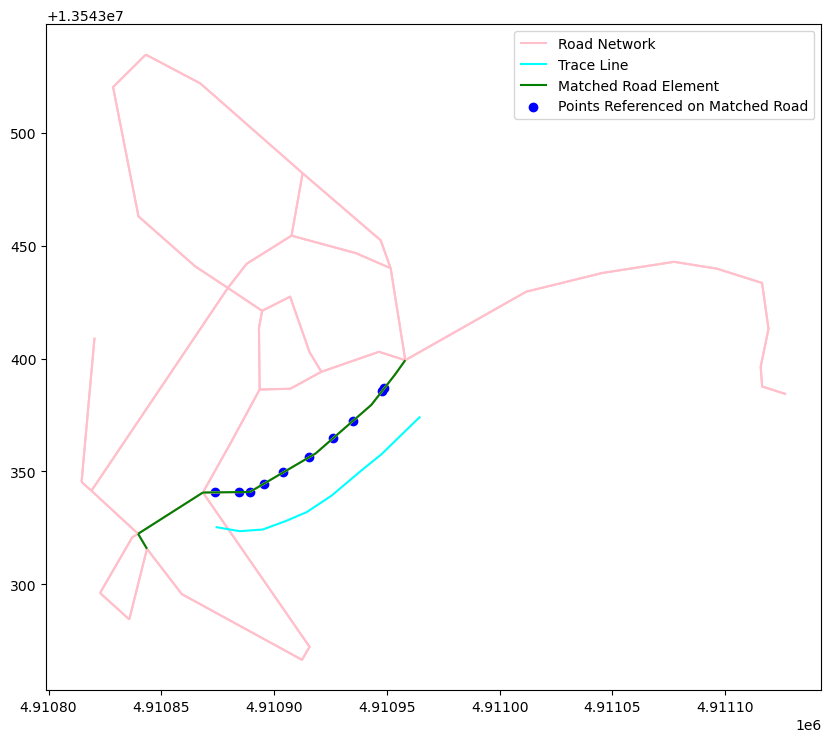

In [7]:
f, ax = plt.subplots(1)

reference_poi_list = list()
connected_shape_list = list()

# A GENERATOR WHICH WILL KEEP ON YEILDING FOR EVERY TRACE PRESENT IN TRACES
for connected_shape, connected_info, reference_poi in matcher.match_traces(traces):
    reference_poi_list.extend(reference_poi)
    connected_shape_list.extend(connected_shape)
    
reference_poi_data_frame = gpd.GeoDataFrame(reference_poi_list,
        columns=['Points'], 
        geometry='Points') 

connected_shape_data_frame = gpd.GeoDataFrame(connected_shape_list,
        columns=['LineString'], 
        geometry='LineString') 

road_network_data_frame.plot(ax=ax, color="pink", label='Road Network')
traces_data_frame.plot(ax=ax,cmap=None, color="cyan", label='Trace Line')

connected_shape_data_frame.plot(ax=ax, cmap=None, color="green", label='Matched Road Element')
reference_poi_data_frame.plot(ax=ax, cmap=None, color="blue", label='Points Referenced on Matched Road')

plt.legend()
plt.show()